In [151]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import ComplementNB, MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
import pickle

In [4]:
train = pd.read_csv('datasets/train.csv', index_col=0)
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45398 entries, 12405 to 13043
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   45398 non-null  object
 1   text    45398 non-null  object
 2   from    45398 non-null  object
 3   lemma   45398 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [5]:
test = pd.read_csv('datasets/test.csv', index_col=0)
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5960 entries, 14745 to 20671
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5960 non-null   object
 1   text    5960 non-null   object
 2   from    5960 non-null   object
 3   lemma   5960 non-null   object
dtypes: object(4)
memory usage: 232.8+ KB


## Подготовка даных для модели

In [6]:
test.label.unique()

array(['positive', 'negative'], dtype=object)

In [7]:
def convert_label(df):
    return df.map(lambda x: 1 if x == 'positive' else 0)

In [9]:
X_train = train.lemma
y_train = convert_label(train.label)

In [11]:
X_test = test.lemma
y_test = convert_label(test.label)

In [10]:
y_train

12405    1
981      1
3263     1
13036    1
5683     1
        ..
19786    0
146      0
15451    0
17869    0
13043    0
Name: label, Length: 45398, dtype: int64

In [25]:
all_text = ' '.join(X_train).split()
counter = Counter(all_text)
counter

Counter({'и': 158480,
         'в': 143897,
         'не': 86113,
         'на': 81770,
         'я': 81293,
         'что': 62904,
         'быть': 60919,
         'с': 57067,
         'весь': 45557,
         'это': 38780,
         'по': 34313,
         'тот': 32697,
         'но': 29010,
         'как': 28507,
         'а': 27956,
         'очень': 27910,
         'ребенок': 24919,
         'мы': 24490,
         'за': 23049,
         'для': 22313,
         'который': 21474,
         'к': 21295,
         'так': 20995,
         'этот': 20504,
         'свой': 19810,
         'у': 19759,
         'курс': 19614,
         'они': 19576,
         'год': 19216,
         'школа': 18823,
         'вы': 17586,
         'обучение': 17171,
         'он': 16117,
         'мой': 15931,
         'занятие': 15578,
         'о': 14615,
         'из': 14300,
         'преподаватель': 14085,
         'если': 13106,
         'время': 12926,
         'мочь': 12858,
         'хороший': 12544,
         'она

In [28]:
words = []
for key, value in counter.items():
    if len(key) < 4:
        words.append((key, value))

print(len(words), words)

2495 [('ахи', 93), ('не', 86113), ('ни', 4908), ('но', 29010), ('из', 14300), ('они', 19576), ('я', 81293), ('о', 14615), ('за', 23049), ('в', 143897), ('тот', 32697), ('с', 57067), ('и', 158480), ('уже', 11128), ('сын', 3403), ('или', 7854), ('у', 19759), ('что', 62904), ('как', 28507), ('омг', 6), ('ты', 8488), ('ава', 44), ('то', 9661), ('а', 27956), ('ха', 202), ('он', 16117), ('это', 38780), ('хах', 93), ('кто', 8446), ('оо', 23), ('б', 279), ('же', 11248), ('дом', 1926), ('его', 1784), ('вот', 6034), ('ну', 3747), ('эх', 93), ('на', 81770), ('мой', 15931), ('ибо', 344), ('до', 8158), ('она', 12497), ('ее', 1590), ('_', 302), ('й', 384), ('суп', 77), ('фон', 150), ('еда', 717), ('да', 4559), ('от', 12023), ('тут', 3532), ('рад', 1252), ('вы', 17586), ('ага', 81), ('к', 21295), ('так', 20995), ('по', 34313), ('год', 19216), ('мы', 24490), ('х', 1143), ('для', 22313), ('где', 6102), ('бы', 7601), ('бог', 563), ('род', 372), ('про', 3365), ('шоо', 1), ('под', 2196), ('мир', 1234), ('

In [31]:
print(sorted(words, key=lambda x: x[1], reverse=True))

[('и', 158480), ('в', 143897), ('не', 86113), ('на', 81770), ('я', 81293), ('что', 62904), ('с', 57067), ('это', 38780), ('по', 34313), ('тот', 32697), ('но', 29010), ('как', 28507), ('а', 27956), ('мы', 24490), ('за', 23049), ('для', 22313), ('к', 21295), ('так', 20995), ('у', 19759), ('они', 19576), ('год', 19216), ('вы', 17586), ('он', 16117), ('мой', 15931), ('о', 14615), ('из', 14300), ('она', 12497), ('от', 12023), ('сам', 11359), ('еще', 11307), ('же', 11248), ('уже', 11128), ('то', 9661), ('ты', 8488), ('кто', 8446), ('до', 8158), ('там', 8017), ('раз', 7893), ('или', 7854), ('наш', 7669), ('бы', 7601), ('нет', 7292), ('сад', 6158), ('где', 6102), ('вот', 6034), ('при', 5657), ('без', 4964), ('ни', 4908), ('два', 4687), ('да', 4559), ('час', 3877), ('все', 3874), ('ну', 3747), ('вуз', 3715), ('т', 3690), ('тут', 3532), ('сын', 3403), ('про', 3365), ('ваш', 2951), ('чем', 2497), ('их', 2404), ('под', 2196), ('три', 2177), ('ли', 2166), ('дом', 1926), ('зал', 1917), ('вид', 1905)

In [34]:
rare_words = [i for i in words if i[1] < 11]
len(rare_words)

1996

In [38]:
stop_list = stopwords.words("russian")
stop_list.extend(['это', 'который', 'всё', 'весь', 'свой', 'наш', 'ещё', 'также', 'ха_хий', 'ха', 'х', 'x', 'п', 'ахи', ''])
stop_list.extend([i[0] for i in rare_words])

for i in ['не', 'нет', 'вдруг', 'ни', 'опять', 'ничего', 'без', 'тоже', 'совсем', 'хорошо', 'лучше']:
    stop_list.remove(i)

In [41]:
' '.join(stop_list)[:400]

'и в во что он на я с со как а то все она так его но да ты к у же вы за бы по только ее мне было вот от меня еще о из ему теперь когда даже ну ли если уже или быть был него до вас нибудь уж вам ведь там потом себя ей может они тут где есть надо ней для мы тебя их чем была сам чтоб будто чего раз себе под будет ж тогда кто этот того потому этого какой ним здесь этом один почти мой тем чтобы нее сейч'

In [42]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True)
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)

In [43]:
len(tfidf.vocabulary_)

63878

In [44]:
amount_of_word = len(set(' '.join(X_train).split()))
amount_of_word, amount_of_word-len(stop_list)

(66015, 63864)

In [45]:
vec

<45398x63878 sparse matrix of type '<class 'numpy.float64'>'
	with 1967334 stored elements in Compressed Sparse Row format>

In [46]:
unique, counts = np.unique(y_test, return_counts=True)
unique, counts

(array([0, 1]), array([2979, 2981]))

In [47]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)
counts = [i/len(y_train) for i in counts]
weight = np.array(counts)
print(weight)

[0 1] [14601 30797]
[0.3216221 0.6783779]


## Метрики

In [49]:
def dis_metrix(predicted, label):
    f1_score = metrics.f1_score(predicted, label, average='weighted')
    precision = metrics.precision_score(predicted, label, average='weighted')
    recall = metrics.recall_score(predicted, label, average='weighted')
    print('F1-мера:',str('{:04.2f}'.format(f1_score*100))+'%')
    print('------------------------------------------------')
    print('Матрица ошибок:')
    print(pd.DataFrame(confusion_matrix(label, predicted)))
    print('------------------------------------------------')
    print('Отчет о классификации:')
    print(classification_report(label, predicted))

    return {'f1_score': f1_score, 'precision': precision, 'recall': recall}

## Создание моделей

In [51]:
model = BernoulliNB(class_prior=weight, alpha=0.2, force_alpha=True, fit_prior=True) 
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 64.73%
------------------------------------------------
Матрица ошибок:
      0    1
0  2687  292
1  2023  958
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70      2979
           1       0.77      0.32      0.45      2981

    accuracy                           0.61      5960
   macro avg       0.67      0.61      0.58      5960
weighted avg       0.67      0.61      0.58      5960



{'f1_score': 0.6473113685990473,
 'precision': 0.7802079082846942,
 'recall': 0.6115771812080537}

In [52]:
model = MultinomialNB(class_prior=weight, alpha=0.1, force_alpha=True)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 74.56%
------------------------------------------------
Матрица ошибок:
      0     1
0  1848  1131
1   408  2573
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71      2979
           1       0.69      0.86      0.77      2981

    accuracy                           0.74      5960
   macro avg       0.76      0.74      0.74      5960
weighted avg       0.76      0.74      0.74      5960



{'f1_score': 0.7456462037717271,
 'precision': 0.7712311634138278,
 'recall': 0.7417785234899329}

In [67]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 76.58%
------------------------------------------------
Матрица ошибок:
      0     1
0  2472   507
1   895  2086
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      2979
           1       0.80      0.70      0.75      2981

    accuracy                           0.76      5960
   macro avg       0.77      0.76      0.76      5960
weighted avg       0.77      0.76      0.76      5960



{'f1_score': 0.7657610878594939,
 'precision': 0.7732310185717962,
 'recall': 0.7647651006711409}

## Сохранение модели для web-приложения

In [71]:
# tfidf and model
pipe = Pipeline([('vectorizer', tfidf), ('classifier', model)])
pred = pipe.predict(test.lemma)

dis_metrix(pred, y_test)

F1-мера: 76.58%
------------------------------------------------
Матрица ошибок:
      0     1
0  2472   507
1   895  2086
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      2979
           1       0.80      0.70      0.75      2981

    accuracy                           0.76      5960
   macro avg       0.77      0.76      0.76      5960
weighted avg       0.77      0.76      0.76      5960



{'f1_score': 0.7657610878594939,
 'precision': 0.7732310185717962,
 'recall': 0.7647651006711409}

In [72]:
pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['и', 'в', 'во', 'что', 'он', 'на',
                                             'я', 'с', 'со', 'как', 'а', 'то',
                                             'все', 'она', 'так', 'его', 'но',
                                             'да', 'ты', 'к', 'у', 'же', 'вы',
                                             'за', 'бы', 'по', 'только', 'ее',
                                             'мне', 'было', ...],
                                 sublinear_tf=True)),
                ('classifier',
                 ComplementNB(alpha=0.1,
                              class_prior=array([0.3216221, 0.6783779])))])

In [73]:
def save_model(name, pipe):
    with open(f'{name}.pickle', 'wb') as picklefile:
        pickle.dump(pipe, picklefile)

def load_model(name):
    with open(f'{name}.pickle', 'rb') as file:
        new_pipe = pickle.load(file)
        return new_pipe

In [75]:
save_model('models/ComplementNB_tfidf', pipe)

In [76]:
model_test = load_model('models/MultinomialNB_tfidf')
model_test.predict(['комментарий для провека'])

array([0])

## Создание моделей

### CountVectorizer

In [78]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform(X_train)
vec_test = count_vec.transform(X_test)

In [81]:
model = BernoulliNB(class_prior=weight, alpha=0.2, force_alpha=True, fit_prior=True) 
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 63.61%
------------------------------------------------
Матрица ошибок:
      0    1
0  2631  348
1  2024  957
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      2979
           1       0.73      0.32      0.45      2981

    accuracy                           0.60      5960
   macro avg       0.65      0.60      0.57      5960
weighted avg       0.65      0.60      0.57      5960



{'f1_score': 0.6361400659186753,
 'precision': 0.7600942674403731,
 'recall': 0.602013422818792}

In [82]:
model = MultinomialNB(class_prior=weight, alpha=0.1, force_alpha=True)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 76.79%
------------------------------------------------
Матрица ошибок:
      0     1
0  2352   627
1   757  2224
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2979
           1       0.78      0.75      0.76      2981

    accuracy                           0.77      5960
   macro avg       0.77      0.77      0.77      5960
weighted avg       0.77      0.77      0.77      5960



{'f1_score': 0.7678940654917488,
 'precision': 0.768733369333439,
 'recall': 0.7677852348993288}

In [83]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 76.38%
------------------------------------------------
Матрица ошибок:
      0     1
0  2575   404
1  1019  1962
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      2979
           1       0.83      0.66      0.73      2981

    accuracy                           0.76      5960
   macro avg       0.77      0.76      0.76      5960
weighted avg       0.77      0.76      0.76      5960



{'f1_score': 0.763802674636836,
 'precision': 0.7825205716937936,
 'recall': 0.761241610738255}

### CountVectorizer with params

In [91]:
count_vec = CountVectorizer(ngram_range=(1, 2), stop_words=stop_list)
vec = count_vec.fit_transform(X_train)
vec_test = count_vec.transform(X_test)

In [92]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 75.97%
------------------------------------------------
Матрица ошибок:
      0     1
0  2396   583
1   852  2129
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2979
           1       0.79      0.71      0.75      2981

    accuracy                           0.76      5960
   macro avg       0.76      0.76      0.76      5960
weighted avg       0.76      0.76      0.76      5960



{'f1_score': 0.7597159961606675,
 'precision': 0.7632950921635799,
 'recall': 0.7592281879194631}

In [101]:
count_vec = CountVectorizer(stop_words=stop_list, max_df=0.9)
vec = count_vec.fit_transform(X_train)
vec_test = count_vec.transform(X_test)

In [102]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 76.43%
------------------------------------------------
Матрица ошибок:
      0     1
0  2545   434
1   983  1998
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2979
           1       0.82      0.67      0.74      2981

    accuracy                           0.76      5960
   macro avg       0.77      0.76      0.76      5960
weighted avg       0.77      0.76      0.76      5960



{'f1_score': 0.7642753719897272,
 'precision': 0.7792036384942317,
 'recall': 0.762248322147651}

### TfidfVectorizer with params

In [104]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True, ngram_range=(1, 3))
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)

In [105]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 69.70%
------------------------------------------------
Матрица ошибок:
      0     1
0  1512  1467
1   401  2580
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      2979
           1       0.64      0.87      0.73      2981

    accuracy                           0.69      5960
   macro avg       0.71      0.69      0.68      5960
weighted avg       0.71      0.69      0.68      5960



{'f1_score': 0.6969558312533812,
 'precision': 0.7505959385549738,
 'recall': 0.6865771812080537}

In [106]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True, ngram_range=(1, 2))
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)

In [107]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 72.71%
------------------------------------------------
Матрица ошибок:
      0     1
0  1909  1070
1   568  2413
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2979
           1       0.69      0.81      0.75      2981

    accuracy                           0.73      5960
   macro avg       0.73      0.73      0.72      5960
weighted avg       0.73      0.73      0.72      5960



{'f1_score': 0.7271394187041296,
 'precision': 0.7393720981010005,
 'recall': 0.7251677852348993}

In [108]:
len(tfidf.vocabulary_)

1230618

In [111]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True)
vec = tfidf.fit_transform(X_train)
# vec_test = tfidf.transform(X_test)
len(tfidf.vocabulary_)

63878

In [112]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True, max_features=30_000)
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)
len(tfidf.vocabulary_)

30000

In [113]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 76.70%
------------------------------------------------
Матрица ошибок:
      0     1
0  2534   445
1   954  2027
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      2979
           1       0.82      0.68      0.74      2981

    accuracy                           0.77      5960
   macro avg       0.77      0.77      0.76      5960
weighted avg       0.77      0.77      0.76      5960



{'f1_score': 0.7669862019482206,
 'precision': 0.7798422409146074,
 'recall': 0.765268456375839}

In [118]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True, max_features=15_000)
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)
len(tfidf.vocabulary_)

15000

In [119]:
model = ComplementNB(class_prior=weight, alpha=0.1)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 76.86%
------------------------------------------------
Матрица ошибок:
      0     1
0  2566   413
1   979  2002
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      2979
           1       0.83      0.67      0.74      2981

    accuracy                           0.77      5960
   macro avg       0.78      0.77      0.76      5960
weighted avg       0.78      0.77      0.76      5960



{'f1_score': 0.7685608392045634,
 'precision': 0.7844653196628278,
 'recall': 0.7664429530201342}

In [120]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True, max_df=0.8, min_df=1, ngram_range=(1, 5), max_features=90_000)
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)
len(tfidf.vocabulary_)

90000

In [126]:
model = ComplementNB(class_prior=weight, alpha=0.5, force_alpha=True)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
dis_metrix(predicted, y_test)

F1-мера: 78.53%
------------------------------------------------
Матрица ошибок:
      0     1
0  2560   419
1   868  2113
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2979
           1       0.83      0.71      0.77      2981

    accuracy                           0.78      5960
   macro avg       0.79      0.78      0.78      5960
weighted avg       0.79      0.78      0.78      5960



{'f1_score': 0.7852873994979473,
 'precision': 0.7954003822418793,
 'recall': 0.7840604026845638}

## Сравнение моделей

In [130]:
models_score = {}

In [150]:
tfidf = TfidfVectorizer(stop_words = stop_list, sublinear_tf=True, max_df=0.8, min_df=1, ngram_range=(1, 5), max_features=90_000)
vec = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)
len(tfidf.vocabulary_)
model = ComplementNB(class_prior=weight, alpha=0.5, force_alpha=True)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
models_score['ComplementNB'] = dis_metrix(predicted, y_test)

F1-мера: 78.53%
------------------------------------------------
Матрица ошибок:
      0     1
0  2560   419
1   868  2113
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2979
           1       0.83      0.71      0.77      2981

    accuracy                           0.78      5960
   macro avg       0.79      0.78      0.78      5960
weighted avg       0.79      0.78      0.78      5960



In [142]:
model = MultinomialNB(class_prior=weight, alpha=0.1, force_alpha=True)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
models_score['MultinomialNB']=dis_metrix(predicted, y_test)

F1-мера: 77.65%
------------------------------------------------
Матрица ошибок:
      0     1
0  2166   813
1   522  2459
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.73      0.76      2979
           1       0.75      0.82      0.79      2981

    accuracy                           0.78      5960
   macro avg       0.78      0.78      0.78      5960
weighted avg       0.78      0.78      0.78      5960



In [148]:
count_vec = CountVectorizer(stop_words=stop_list, max_df=0.8, min_df=1, ngram_range=(1, 5), max_features=90_000)
vec = count_vec.fit_transform(X_train)
vec_test = count_vec.transform(X_test)
model = BernoulliNB(class_prior=weight, alpha=1, force_alpha=True)
model.fit(vec, y_train)
predicted = model.predict(vec_test)
models_score['BernoulliNB']=dis_metrix(predicted, y_test)

F1-мера: 66.88%
------------------------------------------------
Матрица ошибок:
      0    1
0  2803  176
1  2037  944
------------------------------------------------
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72      2979
           1       0.84      0.32      0.46      2981

    accuracy                           0.63      5960
   macro avg       0.71      0.63      0.59      5960
weighted avg       0.71      0.63      0.59      5960



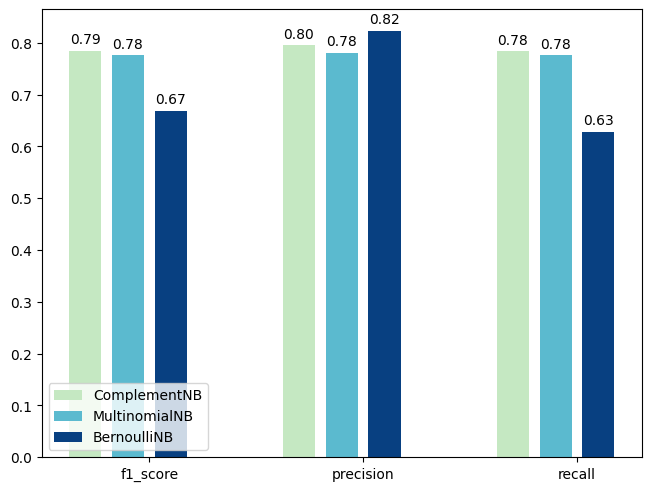

In [149]:
fig, ax = plt.subplots(layout='constrained')

x = np.arange(3)
offset = 0
colors = [plt.cm.GnBu(i) for i in [70, 150, 255]]

plt.set_cmap(cmap=plt.cm.GnBu)
for key, j in enumerate(models_score.keys()):
    score =  models_score[j].values()
    bar = ax.bar(x + offset, score, 0.15, label=j, color=colors[key])
    ax.bar_label(bar, padding=3,  fmt='%.2f')
    offset += 0.2
    

ax.set_xticks(x + 0.3, models_score['BernoulliNB'].keys())
ax.legend()

ComplementNB


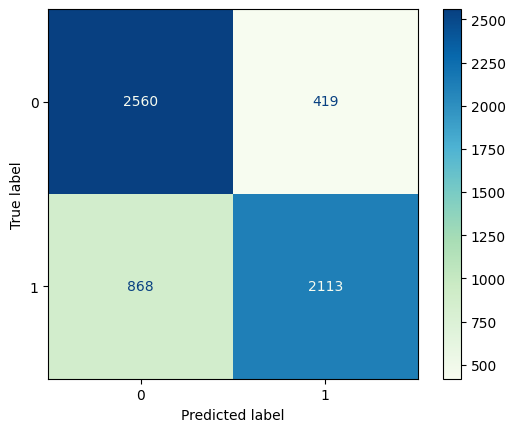

In [153]:
print('ComplementNB')

cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [155]:
pipe = Pipeline([('vectorizer', tfidf), ('classifier', model)])
save_model('models/ComplementNB_tfidf_v2', pipe)

## Обучение модели на данных, где синонимы объединены